# Initial data exploration notebook

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
from sklearn.model_selection import train_test_split

In [6]:
!head ../data/SP000008181.csv

"STATION","DATE","LATITUDE","LONGITUDE","ELEVATION","NAME","PRCP","PRCP_ATTRIBUTES","SNWD","SNWD_ATTRIBUTES","TMAX","TMAX_ATTRIBUTES","TMIN","TMIN_ATTRIBUTES","TAVG","TAVG_ATTRIBUTES"
"SP000008181","1924-03-01","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  120",",,E","   10",",,E",,
"SP000008181","1924-03-02","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  120",",,E","   20",",,E",,
"SP000008181","1924-03-03","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  200",",,E","   30",",,E",,
"SP000008181","1924-03-04","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  225",",,E","   50",",,E",,
"SP000008181","1924-03-05","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  190",",,E","   60",",,E",,
"SP000008181","1924-03-06","41.2928","2.0697","4.0","BARCELONA AEROPUERTO, SP","    0",",,E",,,"  200",",,E","   60",",,E",,
"SP000008181","1924-03-07","41.2928","2.0697","4.0","BARCELONA AER

In [68]:
df = pd.read_csv("../data/SP000008181.csv", low_memory=False)

In [69]:
df.dtypes

STATION             object
DATE                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
NAME                object
PRCP               float64
PRCP_ATTRIBUTES     object
SNWD               float64
SNWD_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
TMIN               float64
TMIN_ATTRIBUTES     object
TAVG               float64
TAVG_ATTRIBUTES     object
dtype: object

In [70]:
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TMAX,TMIN,TAVG
count,3.467100e+04,3.467100e+04,34671.0,34393.000000,2.000000,30738.000000,30555.000000,18798.000000
mean,4.129280e+01,2.069700e+00,4.0,15.544820,430.500000,203.847778,118.302340,160.353655
std,1.421106e-14,4.440956e-16,0.0,66.929501,580.534667,58.619100,60.529923,59.612488
min,4.129280e+01,2.069700e+00,4.0,0.000000,20.000000,0.000000,-80.000000,-21.000000
25%,4.129280e+01,2.069700e+00,4.0,0.000000,225.250000,156.000000,70.000000,112.000000
50%,4.129280e+01,2.069700e+00,4.0,0.000000,430.500000,200.000000,115.000000,154.000000
75%,4.129280e+01,2.069700e+00,4.0,0.000000,635.750000,254.000000,170.000000,213.000000
max,4.129280e+01,2.069700e+00,4.0,1867.000000,841.000000,374.000000,273.000000,303.000000


In [71]:
# prepare dataset
df = df[["DATE", "PRCP", "PRCP_ATTRIBUTES"]]
df["DATE"] = pd.to_datetime(df["DATE"])

In [19]:
df.dtypes

DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
dtype: object

<Axes: >

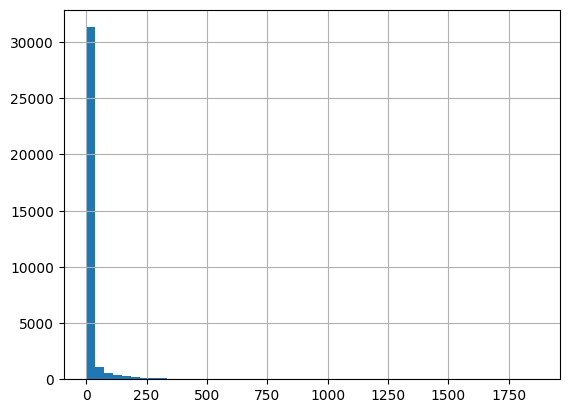

In [72]:
df.PRCP.hist(bins=50)

In [73]:
df.PRCP.max()

np.float64(1867.0)

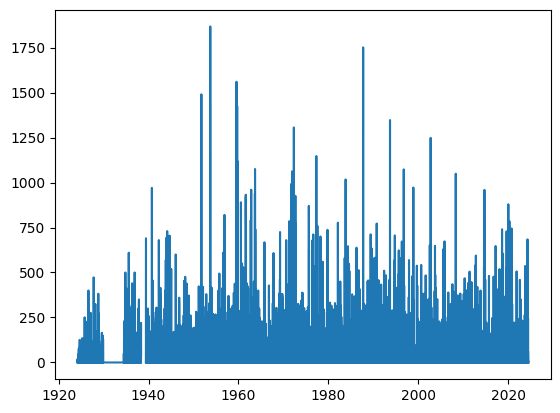

In [74]:
fig, ax = plt.subplots()
ax.plot(df["DATE"], df["PRCP"])

In [78]:
df2 = df[(df["DATE"] > "1935-01-01") & (df["DATE"] < "1940-01-01")]

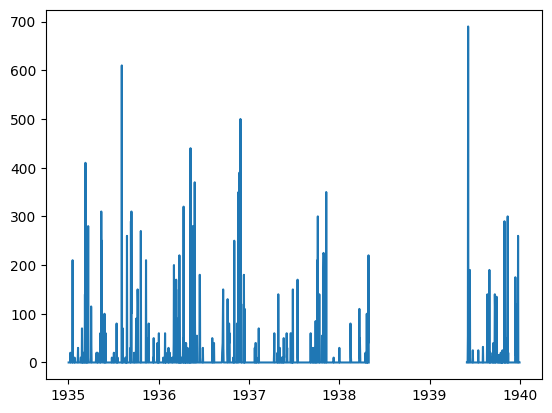

In [79]:
fig, ax = plt.subplots()
ax.plot(df2["DATE"], df2["PRCP"])

In [80]:
# There is big gap in data in 1939-1938 year
df_clean = df[(df["DATE"] > "1939-01-01")]

In [81]:
train, test = train_test_split(df_clean, test_size=0.2)

In [84]:
test

,DATE,PRCP,PRCP_ATTRIBUTES
21546,1988-07-27,0.0,",,E"
23102,1992-10-30,58.0,",,E"
12944,1965-01-07,0.0,",,E"
26701,2002-09-07,0.0,",,E"
25991,2000-09-27,22.0,",,E"
...,...,...,...
28440,2007-06-12,0.0,",,E"
24895,1997-09-27,0.0,",,E"
8547,1952-12-24,0.0,",,E"
30353,2012-09-06,0.0,",,E"
